#### Process the speed hump data
##### Drop any unnecessary columns
##### Change the CRS to EPSG:3857 to match the base map in QGIS
##### Show only actual location of speed bump and not entire block that the speed bump is located in

In [1]:
import warnings, os
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline

In [ ]:
# Load speed hump data file
speedhumps = gpd.read_file("../Raw Data/VZV_Speed Humps_20250630.geojson")

<Axes: >

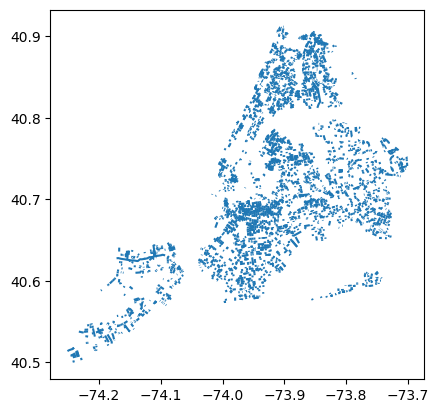

In [4]:
speedhumps.plot()

In [5]:
speedhumps.head()

,on_street,humps,shape_stle,from_stree,date_insta,objectid,to_street,geometry
0,1 STREET,2.0,775.6594772,6 AVENUE,2014-05-22,1,7 AVENUE,"MULTILINESTRING ((-73.97992 40.67286, -73.9775..."
1,1 STREET,2.0,652.150192112,HOYT STREET,2017-09-11,2,BOND STREET,"MULTILINESTRING ((-73.99295 40.679, -73.99091 ..."
2,1 STREET,1.0,230.484633635,WHITWELL PLACE,2024-04-20,3,DENTON PLACE,"MULTILINESTRING ((-73.98623 40.67591, -73.9855..."
3,100 AVENUE,1.0,423.930065281,100 DR./220 STREET,2011-12-15,4,SPRINGFIELD BL.,"MULTILINESTRING ((-73.7356 40.71495, -73.73408..."
4,100 ST,1.0,591.886182108,FOURTH AVE,1996-08-01,5,FT HAMILTON PKWY,"MULTILINESTRING ((-74.03365 40.61283, -74.0318..."


In [6]:
trimmed_speedhumps = speedhumps.drop(columns=["date_insta", "objectid"])

In [7]:
trimmed_speedhumps = trimmed_speedhumps.to_crs("epsg:3857")

In [8]:
os.makedirs('../Clean Data', exist_ok=True)
trimmed_speedhumps.to_file("trimmed_speedhumps.geojson", driver="GeoJSON")